<a href="https://colab.research.google.com/github/JieyuZhang97/WISER_Enverus_2021/blob/main/music_classification_notebook_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README

This notebook contains a simple example using kNN (k-nearest neighbors) to classify music from three spotify playlist. 
- First we will learn how the import songs and music features using <a href=https://spotipy.readthedocs.io/en/2.17.1/>spotipy</a>, a lightweight Python library for the Spotify Web API. 
- Second we will explore the dataset a little bit by plotting some of the data. 
- Third we will build a model to identify the genre of a song using kNN. 
    - we will first build the model from scratch 
    - next we will see how we can take advantage of the powerful machine learning library called `sklearn` 

Before getting started, we need to import the various libraries we will use later. You will see `import` in almost every python script you encounter on the Internet. This is because those libraries are what make python so powerful and so popular. Here you can see that I import the libraries we are using later. But you don't have to figure out all the libraries needed at the beginning. You can alway import more libraries later on when needed.  

In [7]:
# install the library 
!pip install spotipy

In [6]:
# import data ETL (explore, transform and load) related libraries 

## load: import spotify-related libraries 
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth

## explore
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

## transform
from sklearn.preprocessing import MinMaxScaler

## build model 
import math 

## import ML (machine learning) related libraries 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## helper libs
import webbrowser

# Load data from Spotify using Spotipy

It is very easy to get access to songs in Spotify using the `Spotipy` library. All you need is a Spotify account. There are three steps you need to do on the Spotify website


- Log into your Spotify account and get your user name, copy and paste it in the following `username` varible 

- Use this <a href='https://developer.spotify.com/dashboard/'>web site</a>, log in with your Spotify account. Then you will be directed to a Dashboard page, choose create an app. You will get the `Client ID` and `Client Secret`, copy and paste them to this notebook. 
- Click `Edit setting` on the upper right conner of the screen, set the redirect_url with any working website. Here I used https://www.google.ca/. Copy and paste the redirect_url to this notebook. 

- Next you need to grant authorization from your account to your app. We will use python to do this.   



Now you are good to go. 

If you don't want to create a Spotify account, you can use mine as well. Here is an introduction of Spotipy. <a herf='https://medium.com/@maxtingle/getting-started-with-spotifys-api-spotipy-197c3dc6353b'>Getting Started with Spotify’s API & Spotipy</a>

*live demo*

In [2]:
# input necessary credentials 
client_id = "paste your client id here"
#"54dc2c0cd5c44610aead2fa180f811d8" 
client_secret = "paste your client secret here"
#"153979d25ff14edd8a7edf54547f205e" 

username = "paste your user name"
# 'vbl0hdcme81p3wo49w77kkonv'

redirect_uri='paste your redirect uri here '

In [14]:
# input necessary credentials 
client_id = "54dc2c0cd5c44610aead2fa180f811d8"
#"54dc2c0cd5c44610aead2fa180f811d8" 
client_secret = "153979d25ff14edd8a7edf54547f205e"
#"153979d25ff14edd8a7edf54547f205e" 

username = "vbl0hdcme81p3wo49w77kkonv"
# 'vbl0hdcme81p3wo49w77kkonv'
redirect_uri='https://www.google.ca/'


# get the token at https://developer.spotify.com/console/ 
# scope = 'user-library-read playlist-read-private'
token = 'BQC6osw8gSbVxiWDJtPWUAHN-2f4MxFwe8g3WnjIpRys0RR7UJGdAkY0IhDlfGxvlXWK5cEXiOFMW7tZdqcbrK9ESpYf_FffyeaVl19nW1ZeTlofmvFqD5DNa5OrQ9JCQr-cbtqN097_z-qBUo0n3QDQIbsT5tmNym1Ihy1I51JOJWbnPyFdNqohaeYkmn_xC47FiFZgmiYWZxYsrLsTIrePKb7imOcbOrL-fPD3zsfB1b0eFWiiLpMhGcq9sb0Bn6puct0-e1JxLq9bJmfpGGiklfCfdlrWp0e4Bgog'
## connect the notebook withall the muisc on spotify 
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)


In [13]:
# if you are using your local PC to run this notebook, you can run the following two lines to get the token 
# scope = 'user-library-read playlist-read-private'
# token = util.prompt_for_user_token(username, scope,client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)

In [15]:
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager,auth=token)

To get all the songs from the three playlists, we need to know the ids of the three playlists. Here are the links to the three playlists, they are Classical Reading, Jazz Coffee and Rap Workout. The playlist id is the string after the last /.

- Classical Reading: https://open.spotify.com/playlist/37i9dQZF1DWYkztttC1w38
- Jazz Coffee: https://open.spotify.com/playlist/1WxyPZDwKySzXaiE7RHgtV
- Rap Workout: https://open.spotify.com/playlist/37i9dQZF1DX76t638V6CA8

In [16]:
# %%
classical_id = '37i9dQZF1DWYkztttC1w38'
jazz_id = '1WxyPZDwKySzXaiE7RHgtV'
rap_id = '37i9dQZF1DX76t638V6CA8'

To get the songs, I wrote a helper function. 

In [18]:
###--------LIVE CODING-----------------###
def get_playlist(playlist_id,genre):
    # connect to the playlist 
    playlist = sp.user_playlist(username, playlist_id=playlist_id)
    # this line allows us to get all the necessary information of all the songs in that playlist  
    songs = playlist["tracks"]["items"] 
    # create placeholders (empty strings) for storing relavent information 
    ids = [] # id of the song 
    artist_names = [] # name of the artist
    song_names = [] # name of the song 
    for i in range(len(songs)): 
        song_names.append(songs[i]["track"]['name'])
        artist_names.append(songs[i]["track"]['artists'][0]['name'])
        ids.append(songs[i]["track"]["id"]) 
    # get the features of the song 
    features = sp.audio_features(ids) 
    # use a pandas DataFrame to store the music features 
    df = pd.DataFrame(features)
    # add the necessary information we gathered previously to the dataframe 
    df['artist_name'] = artist_names
    df['song_name'] = song_names
    # add the genre of the song
    df['genre'] = genre
    return df 

In [19]:
# create all three dataframe 
df_classical = get_playlist(classical_id,'classical')
df_jazz = get_playlist(jazz_id,'jazz')
df_rap = get_playlist(rap_id,'rap')

Let's see what the data look like.

columns `danceability` to `tempo` are music features and the rest are song information. 

In [ ]:
df_classical.head(3).T

,0,1,2
danceability,0.266,0.253,0.157
energy,0.0662,0.0313,0.184
key,7,4,4
loudness,-21.072,-26.923,-19.854
mode,1,0,0
speechiness,0.0356,0.0522,0.0442
acousticness,0.977,0.993,0.539
instrumentalness,0.922,0.927,0.922
liveness,0.102,0.114,0.107
valence,0.0402,0.0657,0.0304


# Preprocessing 

After loading the data, we need to preprocess the data so it is easier for us to explore the data. First, let't concatenate the three dataframes into one dataframe. To do this, we use the `pd.concar` function 

In [21]:
###--------LIVE CODING-----------------###
# combine all the data as a complete dataframe
df = pd.concat([df_classical,df_jazz,df_rap]).reset_index()


for data exploration, our main focus is the feature columns. So let's get a list of all feature columns. Later in data exploration, instead of calling the complete dataframe, we can only call the features columns. 

In [22]:
###--------LIVE CODING-----------------###
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', \
        'instrumentalness', 'liveness', 'valence', 'tempo']

In [23]:
df[cols].head(3).T

,0,1,2
danceability,0.2660,0.2530,0.1570
energy,0.0662,0.0313,0.1840
key,7.0000,4.0000,4.0000
loudness,-21.0720,-26.9230,-19.8540
mode,1.0000,0.0000,0.0000
speechiness,0.0356,0.0522,0.0442
acousticness,0.9770,0.9930,0.5390
instrumentalness,0.9220,0.9270,0.9220
liveness,0.1020,0.1140,0.1070
valence,0.0402,0.0657,0.0304


In [ ]:
df[cols].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.529368,0.252774,4.484018,-18.440037,0.589041,0.087437,0.667922,0.511899,0.140342,0.329071,108.953858
std,0.280513,0.249153,3.480413,9.460322,0.493135,0.095575,0.364362,0.384165,0.094539,0.274054,31.035378
min,0.059500,0.001940,0.000000,-43.738000,0.000000,0.030100,0.004940,0.000000,0.061500,0.030000,42.313000
25%,0.255500,0.037000,1.000000,-25.577000,0.000000,0.041000,0.340000,0.000391,0.098150,0.063100,83.851500
50%,0.611000,0.171000,5.000000,-17.418000,1.000000,0.046200,0.894000,0.633000,0.109000,0.265000,107.979000
75%,0.794000,0.435000,7.000000,-9.511000,1.000000,0.059350,0.974000,0.888000,0.136000,0.568500,131.023000
max,0.930000,0.826000,11.000000,-2.561000,1.000000,0.481000,0.996000,0.972000,0.790000,0.927000,249.438000


## standardize the data

Here we standardize our data to [0,1]. We can use the following equation to achieve this.
$$
X_{std} = \frac{X - X_{min}}{X_{max} - X_{min}} 
$$

In [24]:
###--------LIVE CODING-----------------###
def standardize(X):
    X_std = (X - X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0))
    return X_std

In [25]:
df[cols] = standardize(df[cols])

In [26]:
df[cols].head(3).T

,0,1,2
danceability,0.237220,0.222286,0.112005
energy,0.077980,0.035628,0.220931
key,0.636364,0.363636,0.363636
loudness,0.550453,0.408359,0.580033
mode,1.000000,0.000000,0.000000
speechiness,0.012198,0.049013,0.031271
acousticness,0.980829,0.996973,0.538878
instrumentalness,0.948560,0.953704,0.948560
liveness,0.055594,0.072066,0.062457
valence,0.011371,0.039799,0.000446


In [27]:
df[cols].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.540870,0.300875,0.410544,0.612859,0.589041,0.132048,0.666410,0.526645,0.104564,0.335933,0.322551
std,0.323490,0.297092,0.316760,0.227803,0.493135,0.220014,0.369807,0.395231,0.125175,0.307152,0.150113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.225158,0.042545,0.090909,0.441047,0.000000,0.024174,0.338082,0.000402,0.050309,0.036901,0.200548
50%,0.633544,0.205155,0.454545,0.639192,1.000000,0.035706,0.897080,0.651235,0.065202,0.272018,0.317161
75%,0.844917,0.515205,0.636364,0.826894,1.000000,0.064870,0.977802,0.913580,0.095402,0.607023,0.429789
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data exploration 

Now let's take a look at the data

## Distribution of each feature 

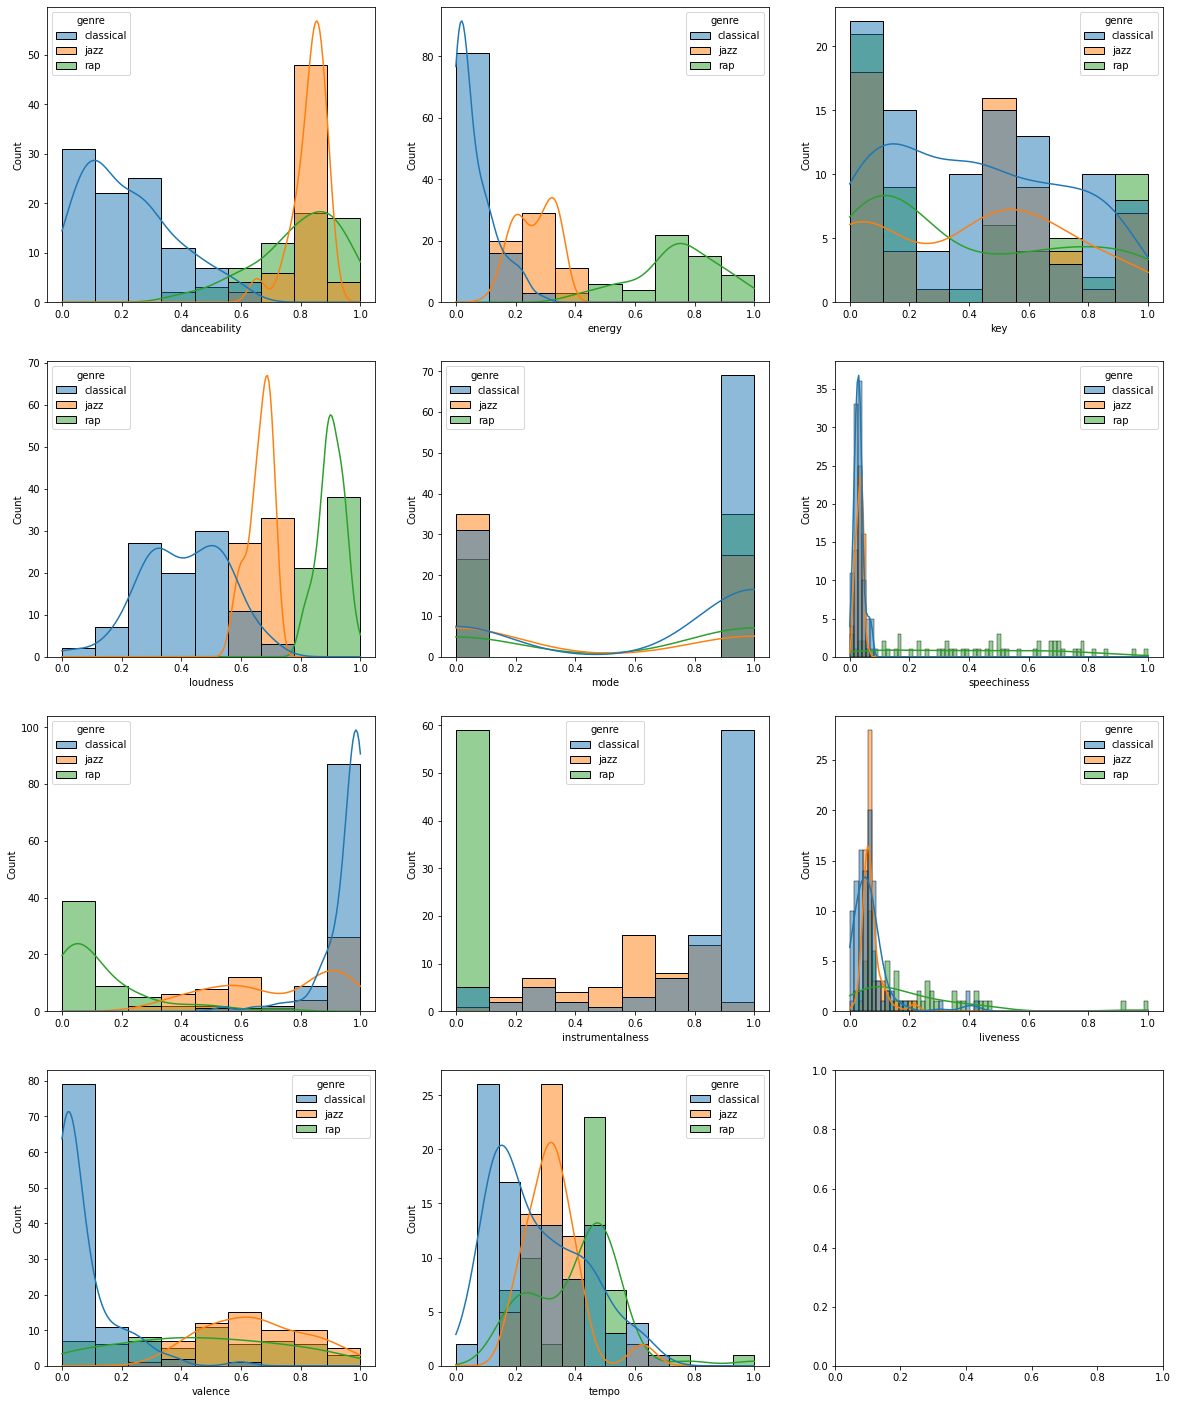

In [28]:
###--------LIVE CODING-----------------###
### create one plot as an example ###
fig,axes = plt.subplots(4,3,figsize=(20,25))
axes = axes.ravel()

for ax,col in zip(axes,cols):
    kde_plot=True
    if col =='instrumentalness':
        # avoid ploting the kde for instrumentalness 
        # can test to see what the kde plot will look like 
        kde_plot=False
    sns.histplot(df, x=col, hue="genre",kde=kde_plot,fill=True,ax=ax)

Here we can see that differen genres have different distributions of music features. These features will be very useful in the model to help us identify the genre of a song. 

## join histogram 

Plotting join histogram is a very common data exploration method. It helps us visualize how different features relate to each other, e.g whether they are correlated or independent. For example, let's plot `danceability` vs `loudness`. Generally speaking, songs that are more danceable are louder. Let's see if this is the case. 

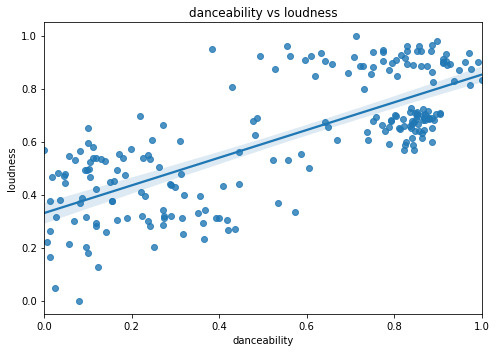

In [29]:
###--------LIVE CODING-----------------###
plt.figure(figsize=(7,5))
joint_plot = sns.regplot(
    data=df,
    x="danceability", y="loudness", #hue="genre"

)
# plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("danceability vs loudness")
plt.tight_layout()

let's try `energy` and `loudness`. Here we can see a clear relation between `energy` and `loudness`. 

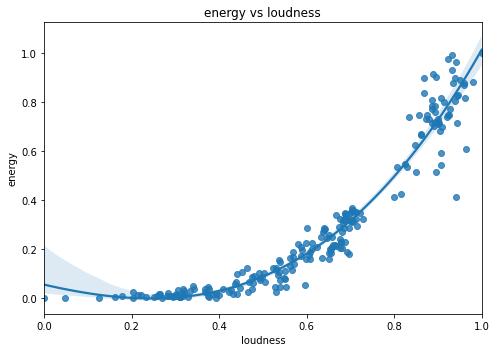

In [30]:
plt.figure(figsize=(7,5))
joint_plot = sns.regplot(
    data=df,
    x="loudness", y="energy", #hue="genre"
    order=3,
)
# plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("energy vs loudness")
plt.tight_layout()

next let's explore more columns by creating the pair plot using seaborn `pariplot` function. 

In [31]:
###--------LIVE CODING-----------------###
cols_plot = ['danceability', 'energy', 'loudness', 'speechiness','instrumentalness']

<Figure size 2160x2160 with 0 Axes>

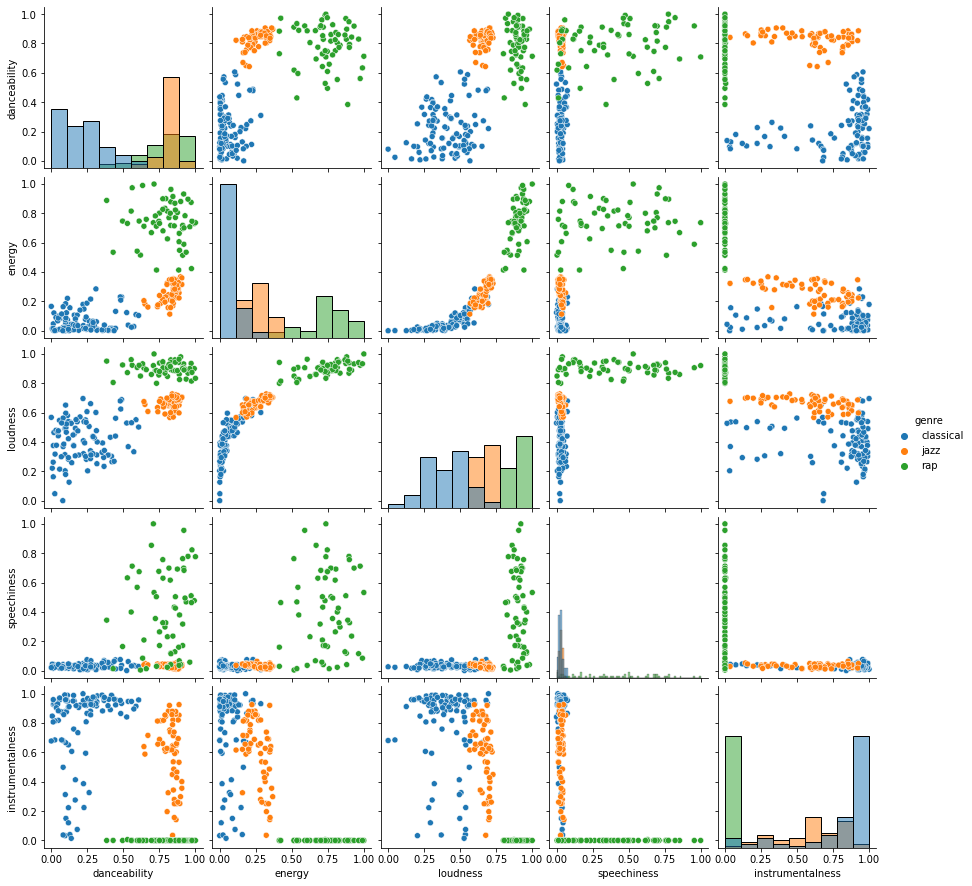

In [32]:

plt.figure(figsize=(30,30))
sns.pairplot(df[cols_plot+['genre']],hue='genre',diag_kind="hist")
# plt.savefig('music_pairplot.pdf')

Similarly, we can create a correlation matrix to see the correlation between different music features.

**Why plotting the correlation matrix?**

Correlation matrix can help us to reduce the number of features. For example, if two features are linearly correlated, there is no point for including both features. For regression problem, a correlation matrix is also helpful when finding collinearily. Here since we don't have many features to begin with, we don't necessary need to reduce the number of features. 

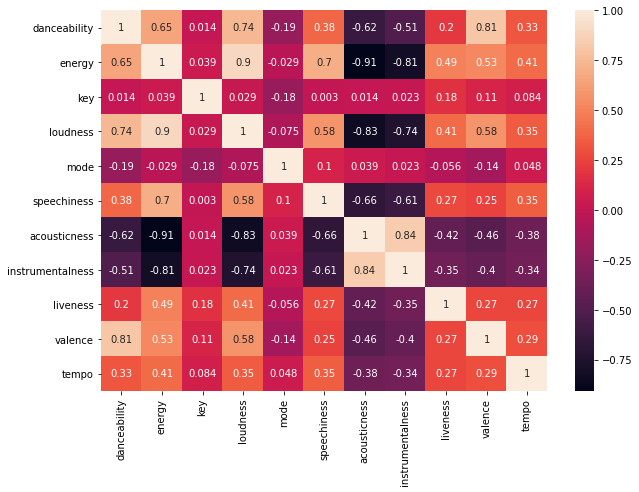

In [33]:
###--------LIVE CODING-----------------###
plt.figure(figsize=(10,7))

sns.heatmap(df[cols].corr(),annot=True,)

## radar chart 

In [35]:
df_polar = df[cols].mean()
df_polar = df[cols+['genre']].groupby('genre').mean()
df_polar.T

genre,classical,jazz,rap
danceability,0.219686,0.830174,0.791042
energy,0.061647,0.264160,0.743683
key,0.411818,0.412121,0.406780
loudness,0.412029,0.663756,0.901491
mode,0.690000,0.416667,0.593220
speechiness,0.030818,0.032236,0.405129
acousticness,0.951597,0.719812,0.128733
instrumentalness,0.794469,0.597966,0.000177
liveness,0.068747,0.073363,0.197001
valence,0.073165,0.647975,0.463970


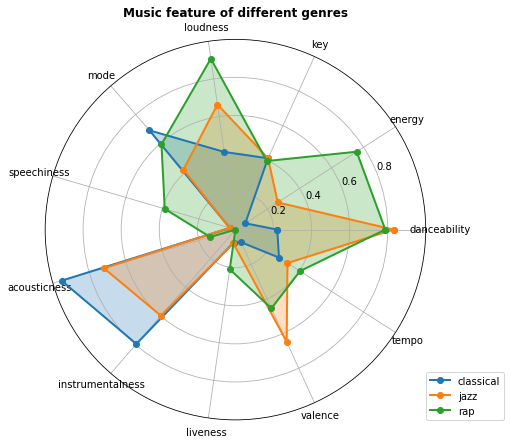

In [ ]:
labels=np.array(cols)
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot

angles=np.concatenate((angles,[angles[0]]))

colors = ['tab:blue','tab:orange','tab:green']

fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, polar=True)
for genre,color in zip(df_polar.index,colors):
    stats=df_polar.loc[genre,labels].values
    stats=np.concatenate((stats,[stats[0]]))
    ax.plot(angles, stats, 'o-', linewidth=2,color=color,label=genre)
    ax.fill(angles, stats, alpha=0.25,color=color)
ax.set_thetagrids((angles * 180/np.pi)[:-1], labels,size=10)
ax.set_title('Music feature of different genres',size=12,weight='bold')
ax.grid(True)
ax.legend(fontsize=10,loc=[1,0])

# build the model - kNN

use danceability and loudness as an example. 

## encode the label column 

First let's change the genre into numbers because that is easier for the model to distinguish. 

In [ ]:
###--------LIVE CODING-----------------###
dict_genre = {'classical':1,'jazz':2,'rap':3}

In [ ]:
df['genre'] = df['genre'].replace(dict_genre)

## get training and testing datasets 

Second, let's split the dataset into training and testing datasets. 

**Why spliting?**

The main reason for splitting the data is to test our model before applying it to real world examples. When developing the model, it is likely that we face a problem called overfitting, which means that the model we build fit the data too well that it is useless when feeding new data to it. Here is an example <a href='https://miro.medium.com/proxy/1*e4Kn-_M_KN2bw-e6kevywA.png'>link</a>.

Sometimes you will hear people split the data into three parts - training, validation and testing. The reason for a validation set is that we want to compare different models before we choose the best model for testing. So the role for each data set is 

- training: train the model 
- validation: find the best model 
- testing: test the best model 

The reason for having both validation and testing datasets is to prevent overfitting because we choose the model that fits the validation dataset the best. This 'choosing-the-best' act can lead to overfitting. If you would like to know more about this, here is a great article (<a href='https://glassboxmedicine.com/2019/09/15/best-use-of-train-val-test-splits-with-tips-for-medical-data/'>link</a>)

Since we only have one model, we will just split the data into training and testing. Here we split them into 80-20, as 80% training and 20% testing. The common ratios are 80-20, 70- 30 or 90-10. 

In [ ]:
###--------LIVE CODING-----------------###
def get_train_test(df,test_percent=0.2):
    ind = df.index
    df_shuffle = df.sample(frac = 1)
    ind_cut = int(len(ind)*(1-test_percent))
    df_train = df_shuffle[:ind_cut]
    df_test = df_shuffle[ind_cut:]
    return df_train, df_test

In [ ]:
df_train, df_test = get_train_test(df[cols_plot+['genre']],test_percent=0.2)

In [ ]:
X_train = df_train.drop(columns=['genre'])
X_test = df_test.drop(columns=['genre'])
y_train = df_train['genre']
y_test = df_test['genre']

## build a knn model from scratch 

Now let's introduce the model we will use to identify the genre of the music, which is call k nearest neighbors. 

**TBC** - list out the specific steps 

In [ ]:
###--------LIVE CODING-----------------### ? - maybe? 
## I adopted the scripts from https://gist.github.com/onelharrison/373d81dc21d43c3126f15d2d0867d80a#file-knn_from_scratch-py 
def knn(X_train,y_train, x_test, k):
    neighbor_distances_and_indices = []
    
    # 3. For each example in the data
    for index, x_train in enumerate(X_train):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = euclidean_distance(x_train, x_test)
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))
    
    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [y_train[i] for distance, i in k_nearest_distances_and_indices]

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    predict_labels = mode(k_nearest_labels)
    return k_nearest_distances_and_indices , predict_labels

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return max(set(labels), key=labels.count)

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

def knn_predict(X_train,y_train,X_test,k,clf_reg='clf'):
    if clf_reg == 'clf':
        choice_fn = mode
    else:
        choice_fn = mean
    y_predict = []
    for _,x_test in enumerate(X_test):
        k_nearest_neighbors, prediction = knn(
            X_train,y_train,x_test , k=k, distance_fn=euclidean_distance, choice_fn=choice_fn
        )
        y_predict = y_predict+ [prediction]
    return y_predict

In [ ]:
df_example = df[['danceability','loudness','genre']]

In [ ]:
colors = np.array(['tab:blue','tab:orange','tab:green'])
genres = ['classical','jazz','rap']

In [ ]:
def visualize_knn(df,colors,classes,k=3,xv=0.5,yv=0.5):
    
    
    test = np.array([xv,yv]).T
    X_train = df.iloc[:,:-1].values
    y_train = df.iloc[:,-1].values
    k_nearest_distances_and_indices, test_prediction = knn(
            X_train,y_train,test, k=k, distance_fn=euclidean_distance, choice_fn=mode
        )
    indices = [ind[1] for ind in k_nearest_distances_and_indices]
    figure,ax = plt.subplots(figsize=(7,5))
    ax.scatter(x=xv,y=yv,c='k',s=70,label = 'predicted: '+classes[test_prediction-1])
    ax.scatter(x=X_train[indices][:,0],y=X_train[indices][:,1],c=colors[y_train[indices]-1])
    for label in df.iloc[:,2].unique():
        index = df.iloc[:,2]  == label
        ax.scatter(x=df.iloc[:,0][index],y=df.iloc[:,1][index],\
                   c=colors[df.iloc[:,2][index].values-1],label=classes[label-1],alpha=0.3)
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.title('knn of {} and {} - k={}'.format(df.columns[0],df.columns[1],k))

    # produce a legend with the unique colors from the scatter
    plt.legend(loc='lower right')
    
    

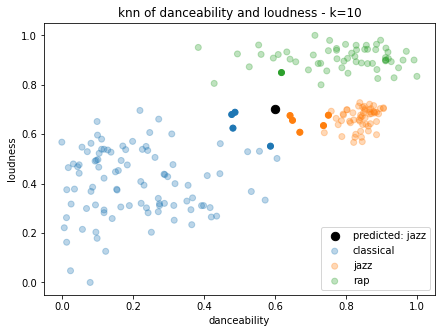

In [ ]:
visualize_knn(df_example,colors=colors, classes=genres,k=10,xv=0.6,yv=0.7)    

Here we can choose more features. However, with more features, it get harder to visualize the process. But the gist is the same. We calculate the distance between the known-label points and unknown-label points and use the mode of the labels as the label of hte unknown-label point. Now let's actually build the model.

In [ ]:
y_pred = knn_predict(X_train.values,y_train.values,X_test.values,k=8,clf_reg='clf')

# Evaluate the model 

There are various ways of evaluating a model. The most common one is to calculate the prediction accuracy - how accurate is our prediction. For classification problem, accuracy can be calculated as 

$$
ACCURACY = \frac{\textrm{NUMBER OF CORRECT PREDICTION}}{\textrm{NUMBER OF TOTAL PREDICTION}}
$$

In [ ]:
###--------LIVE CODING-----------------###
def cal_accuracy(y_pred,y_test):
    return sum(y_pred == y_test)/len(y_test)

In [ ]:
print('knn accuracy = {:.0%}'.format(cal_accuracy(y_pred, y_test)))

knn accuracy = 100%


Here we can see that the knn model is really good with having a 100% accuracy. This could be that the three genres we pick are different enough that the model can distinguish them easily. 

# Let's listen to one 

In [ ]:
###--------LIVE CODING-----------------###
## attached predicted genres to the df_test dataframe
df_test['genre_pred'] = y_pred

In [ ]:
song = df_test.sample()
song_id = df.iloc[song.index]['id'].tolist()[0]
print('genre: {}, predicted genre: {}'.format(genres[song['genre'].values[0]-1],genres[song['genre_pred'].values[0]-1]))

genre: jazz, predicted genre: jazz


In [ ]:
uri_prefix = 'https://open.spotify.com/track/'
uri_song = uri_prefix + song_id

# webbrowser.open(uri_song, new=2)

# A much faster and simplier way! 

So far all the model functions are written by ourselves. However, that is not how data scientists work every day. There are tons of well-developed libraries that we can use one line of code of get. Here we introduce the very famous machine learning library called `sklearn`. Almost 90% of machine learning algorithms are included in this library. Now let's see how we can recreate our knn model using `sklearn`.

## for standardize the data 
Here we can see that value range varies in different columns. Therefore, one thing we can do is to standardize the data. We can use a built-in function from sklearn library called `MinMaxScaler()`. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one (this is set by default).

The function is 
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

where the default values for max and min are 1 and 0. 

Reference can be found <a herf="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">here</a>. 

In [ ]:
###--------LIVE CODING-----------------###
scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])

## For splitting the data 

In [36]:
###--------LIVE CODING-----------------###
## split training and testing datasets 
X = df[cols_plot]
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## For building the knn model 

In [ ]:
###--------LIVE CODING-----------------###
## build a knn model 

neigh = KNeighborsClassifier(n_neighbors=8)

## train the knn model 
neigh.fit(X_train, y_train)

## get prediction 
y_prediction_sk = neigh.predict(X_test)

In [ ]:
## evaluate the model 
print('knn accuracy = {:.0%}'.format(neigh.score(X_test,y_test)))


knn accuracy = 100%
